In [1]:
import numpy
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [2]:
all_df = pd.read_csv("data.csv")

In [3]:
all_df['class']= all_df['class'].map({'RB':0, 'NRB': 1}).astype(int)

In [4]:
all_df.shape

(1055, 42)

In [5]:
X=all_df.drop(['class'], axis=1).values.astype('float64')

In [6]:
Y = all_df['class'].values.astype('int64')

In [7]:
X.shape

(1055, 41)

In [8]:
 X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

844

In [9]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Using TensorFlow backend.


In [10]:
model = Sequential()

In [11]:
model.add(Dense(units=82*2,   input_dim=41,
                kernel_initializer='uniform', 
                activation='relu'))

In [12]:
model.add(Dense(units=82, 
                kernel_initializer='uniform', 
                activation='relu'))

In [13]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 164)               6888      
_________________________________________________________________
dense_2 (Dense)              (None, 82)                13530     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 83        
Total params: 20,501
Trainable params: 20,501
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [16]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=60,verbose=1,callbacks=[early_stopping])

Train on 759 samples, validate on 85 samples
Epoch 1/30
759/759 [==============================] - 3s 4ms/step - loss: 0.6675 - acc: 0.6693 - val_loss: 0.6049 - val_acc: 0.7294
Epoch 2/30
759/759 [==============================] - 0s 132us/step - loss: 0.5580 - acc: 0.7984 - val_loss: 0.4166 - val_acc: 0.7882
Epoch 3/30
759/759 [==============================] - 0s 104us/step - loss: 0.4288 - acc: 0.8472 - val_loss: 0.3138 - val_acc: 0.8353
Epoch 4/30
759/759 [==============================] - 0s 105us/step - loss: 0.3648 - acc: 0.8643 - val_loss: 0.2693 - val_acc: 0.8824
Epoch 5/30
759/759 [==============================] - 0s 99us/step - loss: 0.3240 - acc: 0.8775 - val_loss: 0.2604 - val_acc: 0.8824
Epoch 6/30
759/759 [==============================] - 0s 107us/step - loss: 0.3033 - acc: 0.8827 - val_loss: 0.2409 - val_acc: 0.8941
Epoch 7/30
759/759 [==============================] - 0s 74us/step - loss: 0.2892 - acc: 0.8814 - val_loss: 0.2433 - val_acc: 0.8941
Epoch 8/30
759/759 [=

In [17]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

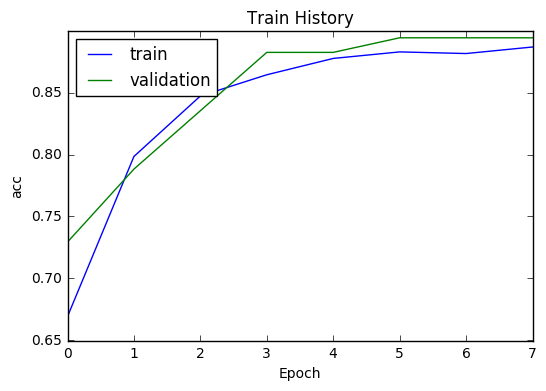

In [18]:
show_train_history(train_history,'acc','val_acc')

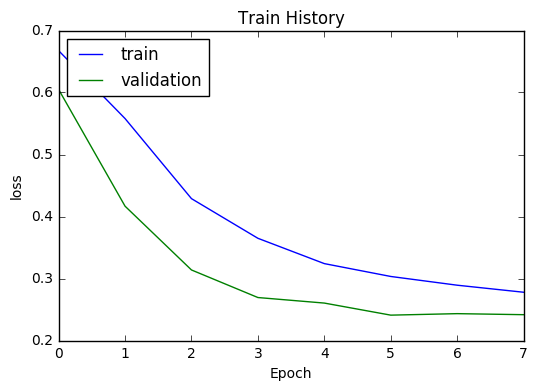

In [19]:
show_train_history(train_history,'loss','val_loss')

In [20]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

211/211 [==============================] - 0s 69us/step


In [21]:
scores[1]

0.8436018943221648